
# Study of data reuse: Cholinergic interneurons in the striatum - Single cell patch clamp recordings (v1)



In this notebook we will look more closely at the EBRAINS dataset "Cholinergic interneurons in the striatum - Single cell patch clamp recordings (v1)", contributed by Sten Grillner from the Department of Department of Neuroscience, Karolinska Institutet, Stockholm.

As we can see from the dataset description,

The study entails the collection of single cell patch-clamp recordings, done in conjunction with morphological reconstructions, from cholinergic interneurons in the striatum. More information is available in the Data Descriptor.

This dataset forms part of the results reported in Hjorth JJJ, Kozlov A, Carannante I, Frost Nylén J, Lindroos R, Johansson Y, Tokarska A, Dorst MC, Suryanarayana SM, Silberberg G, Hellgren Kotaleski J, Grillner S. The microcircuits of striatum in silico. Proc Natl Acad Sci U S A. 2020 Apr 28;117(17):9554-9565. https://doi.org/10.1073/pnas.2000671117

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article.


### Notes

The reproduced results do not use metadata.\
Python version: 3.12.3

### Downloading the data

Please note that this is a 1.7 GB dataset. Over a slow connection, this could take a long time to download. If running this notebook on a shared resource such as the EBRAINS lab, you may need to delete the downloaded data after use, to avoid taking up too much disk space.

To download the data, we first search for the dataset in the EBRAINS Knowledge Graph using the fairgraph tool, then download a zip file, and unzip it.

In [2]:
# TODO 

### Exploring and visualizing the data

The dataset contains a number of files with the extension ".pxp".
There are 4 folders corresponding to the 4 subjects. Original single cell recordings can be find in folders named original for each cell for each subject. 

We know from the dataset metadata that these are electrophysiology data, and more specifically that they were obtained with the whole cell patch clamp technique in current clamp mode. We will therefore use the Neo library to read the data files, since it is able to read data from a large number of electrophysiology file formats.

In [3]:
import numpy as np
from neo import get_io
from neo import io
import os


Neo loads data into a hierarchical structure: Blocks contain Segments, which contain the actual data.

Let's look at the structure of the first three files:


In [4]:
# retrieving datafiles from the folders
file_list = []
folder = os.getcwd()
extension = '.pxp'     
for path_folder, sub_folder, files in os.walk(folder):
    for file in files:
        if file.endswith(extension):
            file_list.append(os.path.join(path_folder, file))



In [5]:
for file_path in file_list[:3]: 
    io = get_io(file_or_folder = file_path)
    print(f"file:{io}")
    block = io.read_block()
    segments = block.segments
    print(f"Number of segments: {len(segments)}")
    signals = segments[0].analogsignals
    print(f"Number of signals per segment: {len(signals)}")

file:<neo.io.igorproio.IgorIO object at 0x7fce021cd820>
Number of segments: 1
Number of signals per segment: 574
file:<neo.io.igorproio.IgorIO object at 0x7fce3c4b37d0>
Number of segments: 1
Number of signals per segment: 981
file:<neo.io.igorproio.IgorIO object at 0x7fce021ae5a0>
Number of segments: 1
Number of signals per segment: 831


It seems that all the data are in one segment.
Thus, one particularity of .pxp files opened with neo is all the data are in one segment. This means one block contains one segment that contains currents as well as membrane potential signals. 
We ought filter the segment.

In [6]:
import quantities as pq

current_unit =  pq.A
potential_unit = pq.V
sig_current = []
sig_potential = []

for sig in signals:
    if sig.units == current_unit:
        sig_current.append(sig)

    if  sig.units == potential_unit:
        sig_potential.append(sig)
print(f"Number of sig_potential: {len(sig_potential)}")
print(f"Number of sig_current: {len(sig_current)}")


Number of sig_potential: 131
Number of sig_current: 604


One way of filter the segment is use the unit. It is possible with neo to classified signals by units. In this case, A (ampere) and V (Volt). It is possible to have signals without units. This is not what we will use to reproduce some of the figures from the articles. 

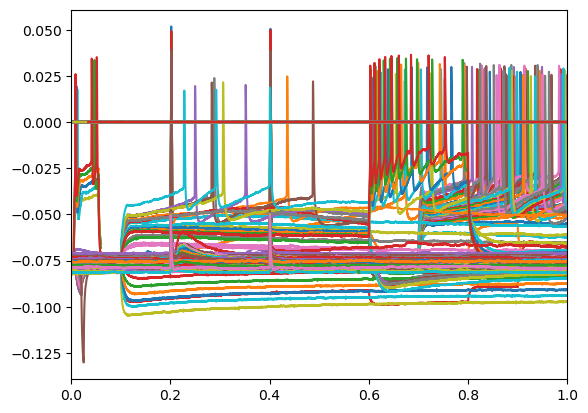

In [36]:
import matplotlib.pyplot as plt

for sig in sig_current:
    plt.plot(sig.times, sig)
plt.xlim(0,1)
plt.show()


Signals used in the Figure 5B and Figure 5D was determined graphically. An algorithm identify the signals used is in development.  

#### Figure 5B

The cell 6 of the subject 4 is used in the figure 5B:\
file used: hbp-00940_ephy-ChIN-STR_sbj4-170614_cell5_original__md_20170614_cell_5_6_ChIN.pxp


In [8]:
io = get_io(file_or_folder = 'downloads/ephy-ChIN-STR/sbj4-170614/cell5/original/hbp-00940_ephy-ChIN-STR_sbj4-170614_cell5_original__md_20170614_cell_5_6_ChIN.pxp')
block = io.read_block()
segments = block.segments
signals = segments[0].analogsignals


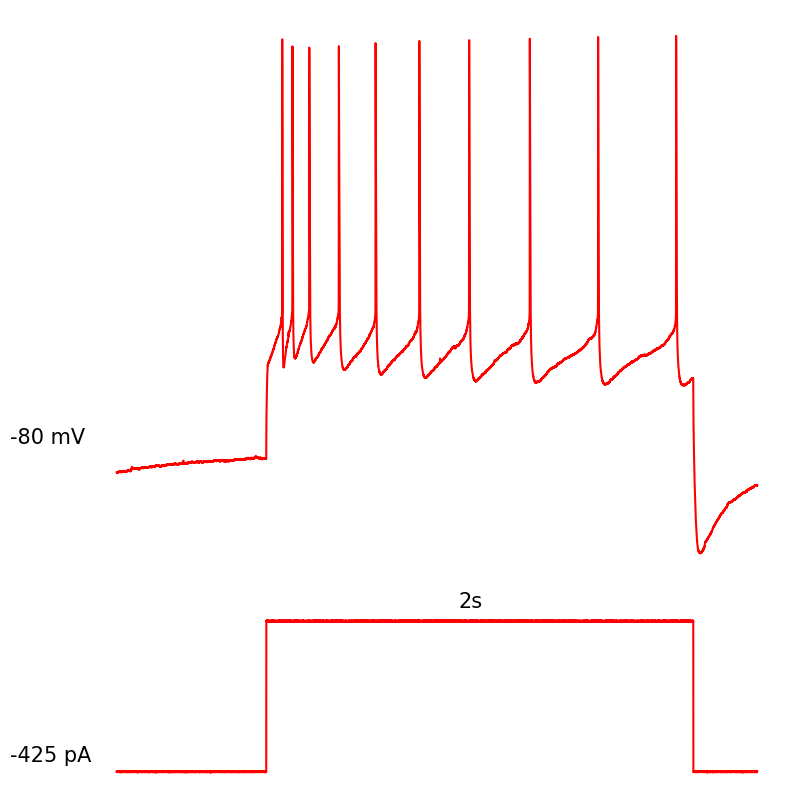

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

y1 = signals[1105] # found graphically
y2 = signals[1071]
x = signals[1105].times


fig = plt.figure(figsize=(20, 10))

gs0 = gridspec.GridSpec(1, 2, figure=fig)
gs00 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs0[0])

ax1 = fig.add_subplot(gs00[0:3, :])
ax1.plot(x, y1, color='red')
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax1.text(-0.5, -0.07, r'-80 mV', size = 15) 



ax2 = fig.add_subplot(gs00[3, :])
ax2.plot(x, y2, color='red')
ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.text(-0.5, -0.0000000004, r'-425 pA', size = 15) 
ax2.text(1.6, 0.000000000010, r'2s', size = 15) 

plt.show()

### Figure5D

The cell 5 of the subject 4 is used in the figure 5D:\
file used: hbp-00940_ephy-ChIN-STR_sbj4-170614_cell5_original__md_20170614_cell_5_6_ChIN.pxp


In [10]:
io = get_io(file_or_folder = 'downloads/ephy-ChIN-STR/sbj4-170614/cell5/original/hbp-00940_ephy-ChIN-STR_sbj4-170614_cell5_original__md_20170614_cell_5_6_ChIN.pxp')
block = io.read_block()
segments = block.segments
signals = segments[0].analogsignals


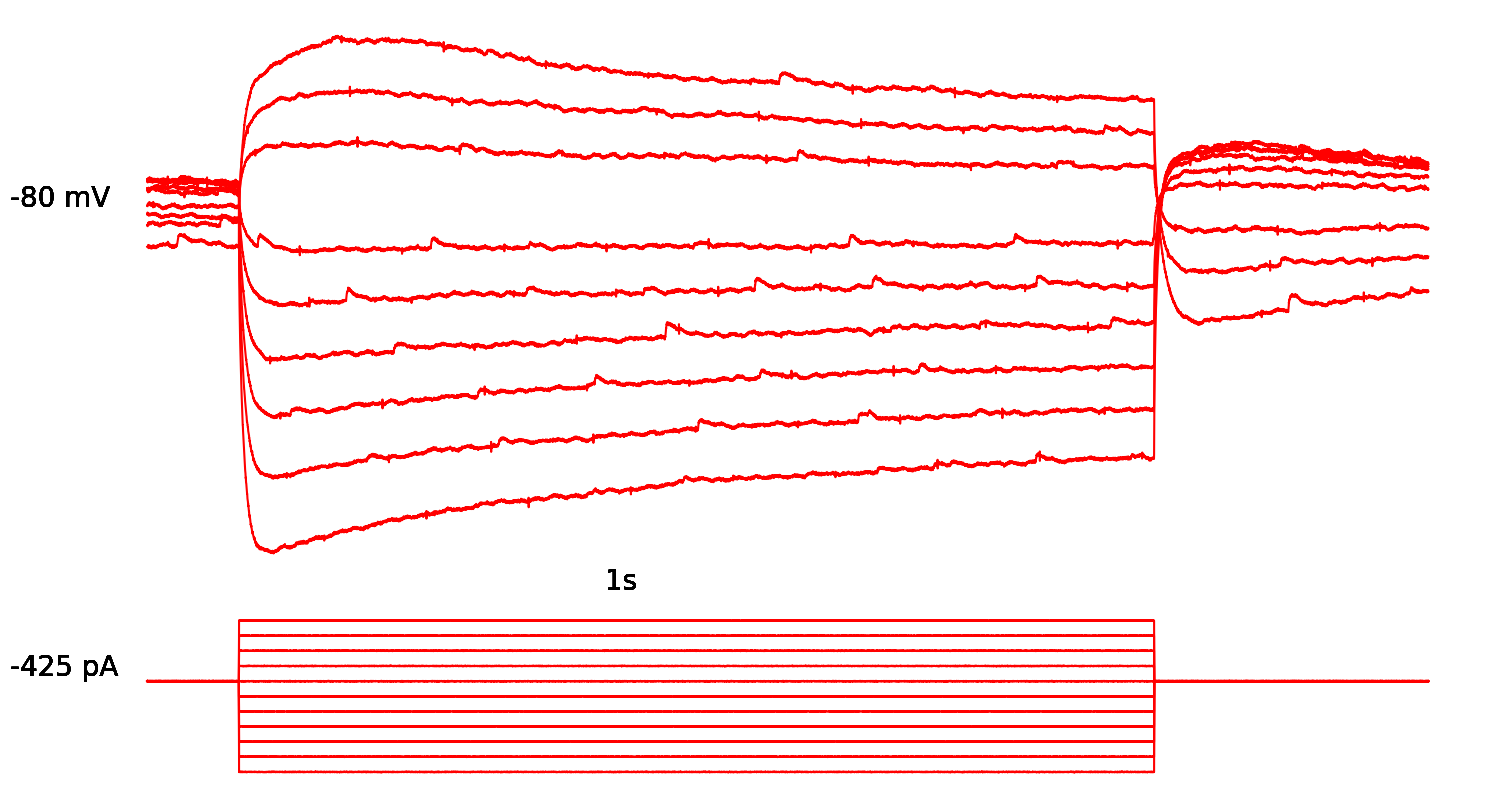

In [35]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(40, 10))
gs0 = gridspec.GridSpec(1, 2, figure=fig)
gs00 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs0[0])

list_index = [1127,1128,1129,1130,1131,1132,1134,1135, 1136]
ax1 = fig.add_subplot(gs00[0:3, :])

for index in list_index:
    signal = signals[index]
    time = signals[index].times
    ax1.plot(time, signal, color='red')
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    ax1.text(-0.15, -0.067, r'-80 mV', size = 20) 

ax2 = fig.add_subplot(gs00[3, :])
for index in range(1113,1124,1):
    signal = signals[index]
    time = signals[index].times
    ax2.plot(time,signal, 'r')
    ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.text(-0.15, -0.0000000004, r'-425 pA', size = 20) 
    ax2.text(0.5, 0.000000000010, r'1s', size = 20) 

plt.show()

Below the original Figure5B. As you can see there is no differences between the reproduced figure and he original. 

![title](Original_figure/pnas.2000671117fig05.jpeg)

### Summary